In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/train.csv")
#df2 = pd.read_csv("../data/test.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


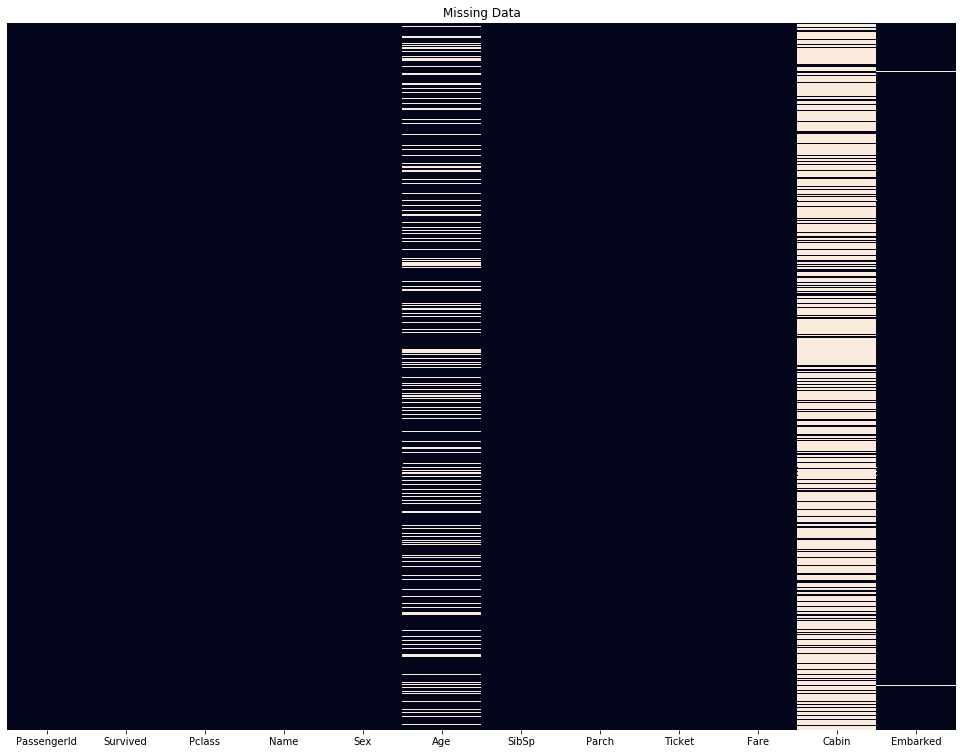

In [4]:
plt.figure(figsize=(17,13))
ax = sns.heatmap(df.isna(),cbar=False);
ax.set_yticks([]);
ax.set_title('Missing Data');

In [5]:
'''plt.figure(figsize=(17,13))
ax2 = sns.heatmap(df2.isna(),cbar=False);
ax2.set_yticks([]);
ax2.set_title('Missing Data');'''

"plt.figure(figsize=(17,13))\nax2 = sns.heatmap(df2.isna(),cbar=False);\nax2.set_yticks([]);\nax2.set_title('Missing Data');"

In [6]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


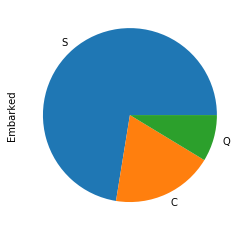

In [7]:
df['Embarked'].value_counts().plot.pie()

In [8]:
# Fills with mode where 'Embarked' equals NaN

df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)

In [9]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [10]:
df.Fare.mode()

0    8.05
dtype: float64

In [11]:
classes = df.Pclass.unique()

In [12]:
classes.sort()
classes

array([1, 2, 3], dtype=int64)

In [13]:
class_fare = pd.DataFrame()
for clas in classes:
    class_fare[clas] = df[df.Pclass == clas].Fare.describe()
class_fare = class_fare.T
class_fare

,count,mean,std,min,25%,50%,75%,max
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [14]:
class_fare.loc[1, 'mean']

84.15468749999992

In [15]:
for i in df[df['Fare'].isna()].index:
    df.iloc[i, 8] = class_fare.loc[df.iloc[i, 1], 'mean']    

In [16]:
titulo = re.compile(r'\b[a-zA-Z]+\b\.')
def title(full_name):
    x = re.search(titulo, full_name)
    return x.group()

In [17]:
def correct_name(full_name):
    if '(' in full_name:
        x = re.search(r'(?<=[\(])(?P<nome>[\W\w]+)(?=[\)])', full_name)
        #x = re.search(r'(?<=[\(])(?P<nome>[\"\.\-\w\s]+)(?=[\)])', full_name)
        return x.group('nome')
    else:
        surname = re.search(r'^(?P<sobrenome>[\W\w]+)(?=[\,])', full_name)
        name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[^\(][\w\W]+)', full_name)
        #surname = re.search(r'^(?P<sobrenome>[\'\-\w\s]+)(?=[\,])', full_name)
        #name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[\w\s\"]+)', full_name)
        return name.group('nome') + ' ' + surname.group('sobrenome')

In [18]:
def family_name(full_name):
    x = re.search(r'^.+(?=[\,])', full_name)
    return x.group()

In [19]:
def family_nickname(full_name):
    x = re.search(r'(?<=\.\s).*?(?= \(|$)', full_name)
    return x.group()

In [20]:
df['Title'] = df['Name'].apply(title)

In [21]:
df['Person'] = df['Name'].apply(correct_name)

In [22]:
df['FamilyName'] = df['Name'].apply(family_name)

In [23]:
df['FamilyNickname'] = df['Name'].apply(family_nickname)

In [24]:
df['HasFamilyOnboard'] = np.where((df['Parch']>0) | (df['SibSp']>0), 1, 0)

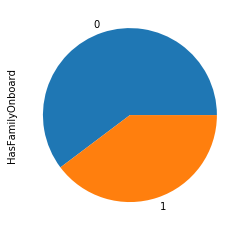

In [25]:
df.HasFamilyOnboard.value_counts().plot.pie()

In [26]:
df['EmbarkedWithSomeone'] = np.where((df['Parch']>0) | (df['SibSp']>0), 1, 0)

no_family_onboard = df[df['HasFamilyOnboard'] == 0]

no_family_onboard.shape

df.Ticket.nunique()

df.Ticket.isna().sum()

no_family_onboard.Ticket.nunique()

df.Ticket.max()

df.Ticket.str.extract(r'(\d+$)')[0].str.zfill(10)

In [27]:
df['TicketNum'] = df.Ticket.str.extract(r'(\d+$)').fillna('-1').astype('int32')

In [28]:
df.iloc[df[df.TicketNum == -1].TicketNum.index, 18] = np.NaN

In [29]:
nan_indices = df[df.TicketNum.isna()]

In [30]:
df.TicketNum.interpolate(inplace=True)

In [31]:
interpolated_ticket_nums = list()
for indice in nan_indices.index:
    df.iloc[indice, 18] = df.iloc[indice, 18].round()

In [32]:
df.iloc[:, 17].name

'EmbarkedWithSomeone'

In [33]:
df.iloc[df[df.TicketNum.duplicated(keep=False)].index, 17] = 1

In [34]:
for indice in nan_indices.index:
    print(df.iloc[indice].EmbarkedWithSomeone)

0
0
0
0


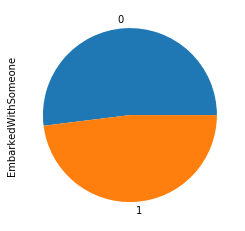

In [35]:
df.EmbarkedWithSomeone.value_counts().plot.pie()

In [36]:
groups = df.TicketNum.value_counts()

In [37]:
df['GroupNum'] = ""

In [38]:
df.iloc[:, 19].name

'GroupNum'

In [39]:
for group in groups.iteritems():
    grupo = df[df.TicketNum == group[0]].index
    for pessoa in grupo:
        df.iloc[pessoa, 19] = len(grupo)

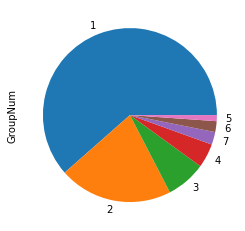

In [40]:
df.GroupNum.value_counts().plot.pie()

In [41]:
df.GroupNum.corr(df.Survived)

0.04574992975644131

In [42]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person,FamilyName,FamilyNickname,HasFamilyOnboard,EmbarkedWithSomeone,TicketNum,GroupNum
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.050,NaN,S,Mr.,Alfonzo Meo,Meo,Alfonzo,0,0,11206.0,1
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.250,NaN,S,Mr.,Einar Windelov,Windelov,Einar,0,0,3101317.0,1
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.700,C47,C,Mr.,Pierre Marechal,Marechal,Pierre,0,0,11774.0,1
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.525,NaN,S,Master.,"Frank John William ""Frankie"" Goldsmith",Goldsmith,"Frank John William ""Frankie""",1,1,363291.0,3
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.500,E101,S,Miss.,"Edwina Celia ""Winnie"" Troutt",Troutt,"Edwina Celia ""Winnie""",0,0,34218.0,1


In [43]:
df.EmbarkedWithSomeone.corr(df.Survived)

0.24812997807258258

df.FamilyName.nunique()

In [44]:
df['AgeRiskFactor'] = np.where((df['Age'] < 13), (13 - df['Age']), 0)

In [45]:
df['AgeRiskFactor'] = np.where((df['Age'] > 51), (df['Age'] - 51), df['AgeRiskFactor'])

In [46]:
df['AgeRiskFactor'].sample(10)

69      0.00
274     0.00
755    12.33
883     0.00
779     0.00
834     0.00
84      0.00
577     0.00
791     0.00
668     0.00
Name: AgeRiskFactor, dtype: float64

In [47]:
df.AgeRiskFactor.corr(df.Survived)

0.06614059485101755

families = df.groupby(['FamilyName', 'TicketNum', 'FamilyNickname']).sum()

families

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Person,FamilyName,FamilyNickname,HasFamilyOnboard,EmbarkedWithSomeone,TicketNum,GroupNum,AgeRiskFactor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr.,Owen Harris Braund,Braund,Owen Harris,1,1,21171.0,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs.,Florence Briggs Thayer,Cumings,John Bradley,1,1,17599.0,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss.,Laina Heikkinen,Heikkinen,Laina,0,0,3101282.0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs.,Lily May Peel,Futrelle,Jacques Heath,1,1,113803.0,2,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr.,William Henry Allen,Allen,William Henry,0,0,373450.0,1,0.0


no_family_onboard[no_family_onboard.Ticket.str.contains('LINE')]

no_family_onboard.Ticket.value_counts()

tickets[0].nunique()

tickets[1].isna().sum()

df[df['Title'].str.contains('Rev.')]

df[df['Name'].str.contains('Maioni')]

df[df['Title'] == 'Dr.'].Survived.value_counts()

def family(fname):
    return df[df['Name'].str.contains(fname)].values, df2[df2['Name'].str.contains(fname)].values

#family('Carter')

underaged = df[df.Age < 16]
underaged['Title'].value_counts()

families = df[['Name'.split(',')[0], 'Ticket', 'PassengerId', 'SibSp', 'Parch']].copy()

def surname(x):
    return(x.split(',')[0])

families.loc[:, 'Name'] = families.loc[:, 'Name'].apply(surname)
families

families_gb = families.groupby(['Ticket', 'PassengerId'], as_index=False).agg(lambda name: ';'.join(name))

families_gb

df.info() # Método .info

df.T.head()

df.dtypes

df.columns

df['Pclass']

males_survived = df[(df["Sex"] == "male") & (df["Survived"] == 1)]

df.Survived.value_counts(normalize=True)

type(df.Survived)

type(df['Survived'])

df['Survived'].value_counts()

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Person,FamilyName,FamilyNickname,HasFamilyOnboard,EmbarkedWithSomeone,TicketNum,GroupNum,AgeRiskFactor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr.,Owen Harris Braund,Braund,Owen Harris,1,1,21171.0,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs.,Florence Briggs Thayer,Cumings,John Bradley,1,1,17599.0,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss.,Laina Heikkinen,Heikkinen,Laina,0,0,3101282.0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs.,Lily May Peel,Futrelle,Jacques Heath,1,1,113803.0,2,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr.,William Henry Allen,Allen,William Henry,0,0,373450.0,1,0.0


In [50]:
cats = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']].copy()

In [51]:
hot = OneHotEncoder(sparse=False)
cats_hot = hot.fit_transform(cats)

In [52]:
cats_hot = pd.DataFrame(cats_hot,columns=hot.get_feature_names())
cats_hot.head()

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_0,x2_1,x2_2,x2_3,x2_4,...,x5_Major.,x5_Master.,x5_Miss.,x5_Mlle.,x5_Mme.,x5_Mr.,x5_Mrs.,x5_Ms.,x5_Rev.,x5_Sir.
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
df = df.merge(cats_hot,how='left',on=df.index)

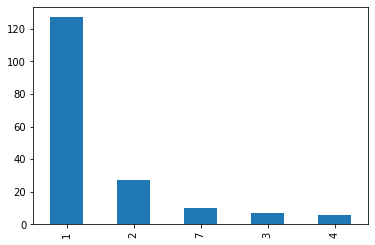

In [54]:
df[df.Age.isna()].GroupNum.value_counts().plot.bar()

In [55]:
df.Age.mean()

29.69911764705882

In [56]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [57]:
df.head(1).T

,0
key_0,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
...,...
x5_Mr.,1
x5_Mrs.,0
x5_Ms.,0
x5_Rev.,0


In [58]:
df.drop(['key_0', 'PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Person', 'FamilyName', 'FamilyNickname', 'TicketNum'], axis=1, inplace=True)

In [59]:
df.head(1)

,Survived,Age,Fare,HasFamilyOnboard,EmbarkedWithSomeone,GroupNum,AgeRiskFactor,x0_1,x0_2,x0_3,...,x5_Major.,x5_Master.,x5_Miss.,x5_Mlle.,x5_Mme.,x5_Mr.,x5_Mrs.,x5_Ms.,x5_Rev.,x5_Sir.
0,0,22.0,7.25,1,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


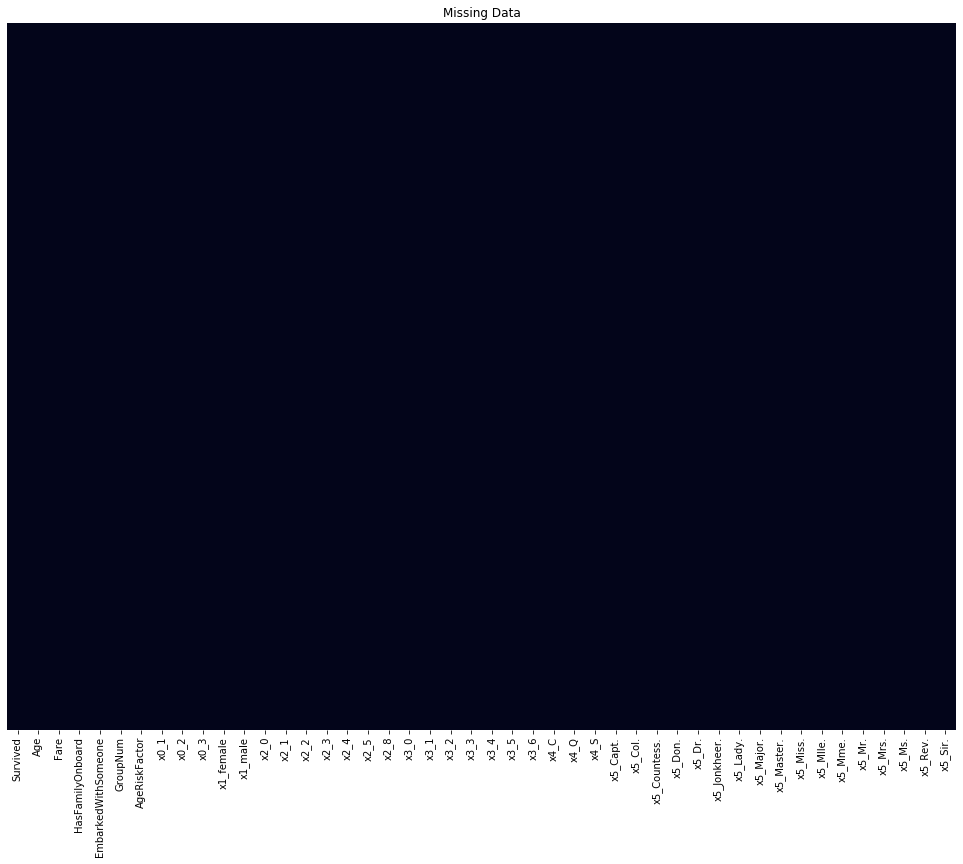

In [60]:
plt.figure(figsize=(17,13))
ax3 = sns.heatmap(df.isna(),cbar=False);
ax3.set_yticks([]);
ax3.set_title('Missing Data');

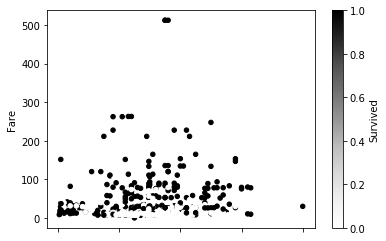

In [61]:
df.plot.scatter(x='Age', c='Survived', y='Fare')

In [62]:
x = df.drop('Survived',axis=1)
y = df.Survived

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
logreg.score(x_test,y_test)

0.8208955223880597

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
logreg = LogisticRegression()
params = {'penalty':['l1','l2'],'max_iter':[100,200,300,400],'solver':['warn','liblinear','saga']}


grid = GridSearchCV(logreg,param_grid=params,cv=5)
grid.fit(x,y)

C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2'],
                         'solver': ['warn', 'liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [69]:
grid.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'warn'}

In [70]:
grid.best_score_

0.8260381593714927

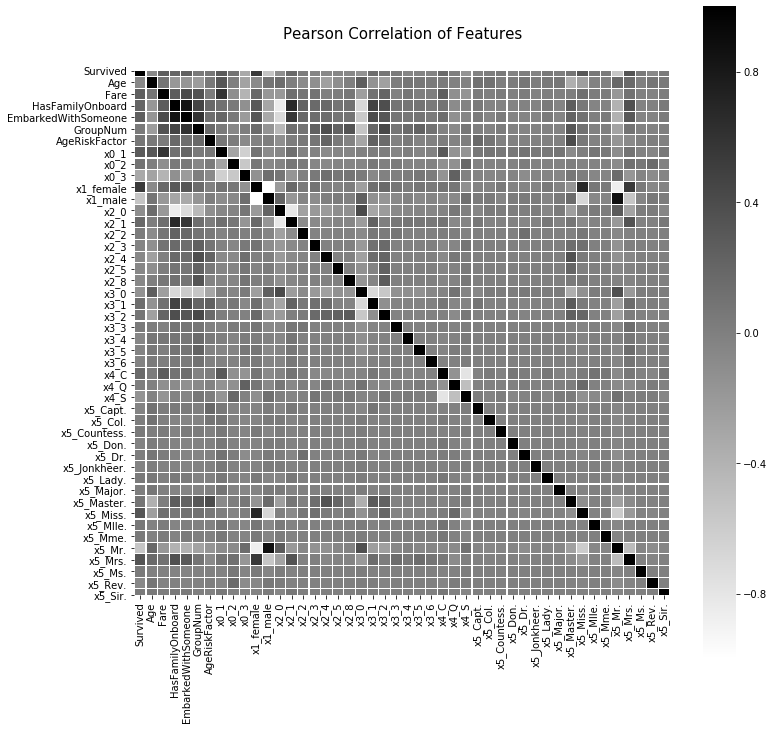

In [71]:
colormap = plt.cm.binary
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)